In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mpl.rcParams['font.size']=14

In [2]:
file = pd.read_csv('/data/keeling/a/xx24/d/proj_film/data.csv', sep=",",header=0)

In [ ]:
file

,SO4,NO3,Cl,NH4,CO3,Na,Ca,OIN,BC,H2O,...,dry_diam,d_init,v_beta,kappa,i_newton,sigma_shell,sigma_core,crit_diam,tolerence,valid
0,1.769470e-24,0.000000e+00,0.000000e+00,6.635530e-25,0.0,0,0.0,0.0,0.000000e+00,0.000000e+00,...,2.351990e-08,7.055970e-07,4.379450e-24,0.232786,13,0.03,0.073000,1.401670e-07,2.444920e-15,5.959514
1,6.371730e-24,0.000000e+00,0.000000e+00,2.389400e-24,0.0,0,0.0,0.0,0.000000e+00,0.000000e+00,...,3.605010e-08,1.081500e-06,1.577000e-23,0.232786,13,0.03,0.073000,2.657200e-07,1.934740e-14,7.370847
2,1.421540e-24,0.000000e+00,0.000000e+00,5.330770e-25,0.0,0,0.0,0.0,0.000000e+00,0.000000e+00,...,2.186450e-08,6.559360e-07,3.518310e-24,0.232786,14,0.03,0.073000,1.256630e-07,1.698930e-14,5.747356
3,1.042280e-24,0.000000e+00,0.000000e+00,3.908560e-25,0.0,0,0.0,0.0,0.000000e+00,0.000000e+00,...,1.971590e-08,5.914760e-07,2.579650e-24,0.232786,15,0.03,0.073000,1.076440e-07,7.010170e-16,5.459782
4,1.163130e-24,0.000000e+00,0.000000e+00,4.361740e-25,0.0,0,0.0,0.0,0.000000e+00,0.000000e+00,...,2.045020e-08,6.135050e-07,2.878750e-24,0.232786,14,0.03,0.073000,1.136970e-07,2.680230e-13,5.559719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129704,2.300020e-21,1.115970e-20,8.505070e-23,4.153450e-21,0.0,0,0.0,0.0,1.984020e-22,6.667380e-20,...,3.569000e-07,1.070700e-05,5.906620e-21,0.492999,8,0.03,0.072829,7.198040e-06,3.797340e-13,20.168239
129705,2.412720e-21,1.014970e-20,7.764560e-23,3.898110e-21,0.0,0,0.0,0.0,9.213070e-24,6.211980e-20,...,3.522670e-07,1.056800e-05,6.340920e-21,0.478878,8,0.03,0.072991,7.159300e-06,3.474370e-13,20.323505
129706,5.052200e-21,2.035470e-20,1.556790e-22,7.897900e-21,0.0,0,0.0,0.0,7.612350e-23,1.256350e-19,...,4.485360e-07,1.345610e-05,1.371210e-20,0.470577,7,0.03,0.072965,1.034230e-05,5.715510e-13,23.058002
129707,5.339460e-22,6.828710e-25,5.821250e-27,2.004320e-22,0.0,0,0.0,0.0,0.000000e+00,2.459630e-21,...,1.579000e-07,4.737010e-06,1.326260e-21,0.232663,9,0.03,0.073000,2.435360e-06,4.174630e-13,15.423401


In [4]:
R = 8.314 #J⋅K−1⋅mol−1
mv = 18 * 1e-3 # Kg mol-1
rho_w = 1000 # Kg m-3
delta_min = 1.6e-10
sigma_org = 0.03
sigma_sol = 0.073
delta_sigma = sigma_org - sigma_sol
sigma_water = 0.073

In [5]:
def old_SS(d0,kappa,T):
    dw = np.linspace(d0, 1e-5,100000)
    p_d = (dw**3 - d0**3)/((dw**3 - (1-kappa)*d0**3))
    A = 4*mv*sigma_water/(R*T*rho_w)
    f = dw**6 - 3*d0**3*kappa*dw**4/A - d0**3*(2-kappa)*dw**3 + (1-kappa)*d0**6
    d_f = 6*dw**5 - 12*d0**3*kappa*dw**3/A - 3*d0**3*(2-kappa)*dw**2
    return (p_d*np.exp(A/dw)-1)*100, f, d_f

In [6]:
def new_SS(d0,kappa,T,v_beta):
    dw = np.linspace(d0, 1e-5,100000)
    tilde_A = 4*mv/(R*T*rho_w)
    d2_v_delta = 2*np.pi*delta_min

    p_d = np.zeros(len(dw))
    v_delta = np.zeros(len(dw))
    sigma = np.zeros(len(dw))
    ss = np.zeros(len(dw))
    d_sigma = np.zeros(len(dw))
    d_v_delta = np.zeros(len(dw))
    ss = np.zeros(len(dw))
    R_d = np.zeros(len(dw))
    f = np.zeros(len(dw))
    d_f = np.zeros(len(dw))
    d_R_d = np.zeros(len(dw))
    c_beta = np.zeros(len(dw))

    for i in range(len(dw)):
        p_d[i] = (dw[i]**3 - d0**3)/((dw[i]**3 - (1-kappa)*d0**3))
        v_delta[i] = 4*np.pi*((dw[i]/2)**3-(dw[i]/2-delta_min)**3)/3
        d_v_delta[i] = 2*np.pi*delta_min*(dw[i]-delta_min)
        d_sigma[i] = - v_beta*delta_sigma*d_v_delta[i]/v_delta[i]**2
        if v_beta > v_delta[i]:
            sigma[i] = sigma_org
            c_beta[i] = 1
        else:
            sigma[i] = sigma_sol + v_beta*delta_sigma/v_delta[i]
            c_beta[i] = v_beta/v_delta[i]
        R_d[i] = sigma[i] - dw[i]*d_sigma[i]
        d_R_d[i] = dw[i]*v_beta*delta_sigma*(v_delta[i]*d2_v_delta - 2*d_v_delta[i])/v_delta[i]**3
        f[i] = dw[i]**6 - 3*kappa*d0**3*dw[i]**4/(tilde_A*R_d[i]) - (2-kappa)*d0**3*dw[i]**3 + (1-kappa)*d0**6
        d_f[i] = 6*dw[i]**5 - (3*kappa*d0**3/tilde_A)*((4*dw[i]**3*R_d[i]-dw[i]**4*d_R_d[i])/R_d[i]**2) - 3*(2-kappa)*d0**3*dw[i]**2
        ss[i] = p_d[i]*np.exp(tilde_A*sigma[i]/dw[i])

    ss_max_index = np.argmax(ss)
    crit_diam = dw[ss_max_index]
    return dw, (ss-1)*100, sigma, R_d, f, d_f, crit_diam, c_beta

[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')]

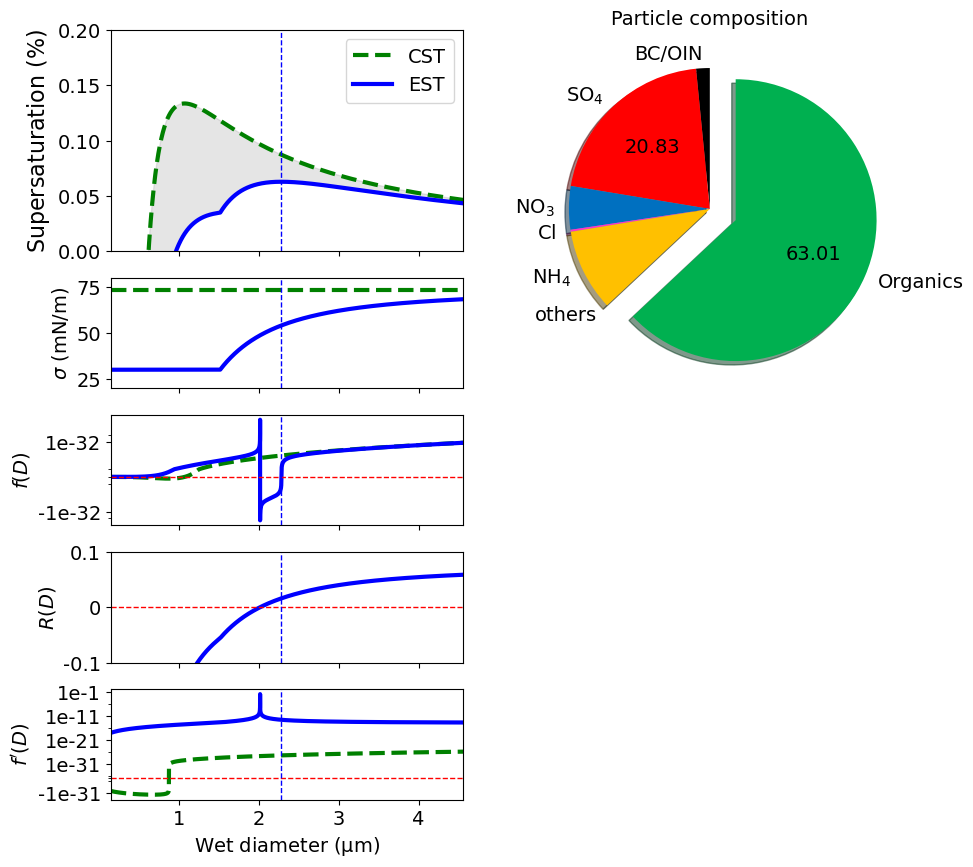

In [8]:
i=8254

d0, kappa, T, v_beta = file['dry_diam'][i], file['kappa'][i], file['T'][i], file['v_beta'][i]
volume = file['SO4'][i] + file['NO3'][i]+ file['Cl'][i]+ file['NH4'][i]+ file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]+ file['BC'][i] + file['OIN'][i]+ v_beta

old_ss, f_old, d_f_old = old_SS(d0, kappa, T)
Dw, new_ss, sigma, R_d, f_new, d_f_new, crit_diam, c_beta = new_SS(d0,kappa,T,v_beta)

gs = gridspec.GridSpec(5, 2, height_ratios=[2, 1, 1, 1, 1])
fig = plt.figure(figsize=(10, 10))

ax00 = plt.subplot(gs[0, 0])
ax10 = plt.subplot(gs[1, 0])
ax20 = plt.subplot(gs[2, 0])
ax30 = plt.subplot(gs[3, 0])
ax40 = plt.subplot(gs[4, 0])
ax01_11 = plt.subplot(gs[0:2, 1])  

ax00.plot(Dw*1e6, old_ss, c = 'g', linewidth=3, ls ='--', label = 'CST')
ax00.plot(Dw*1e6, new_ss, c = 'b', linewidth=3, label = 'EST')
ax00.set_xlim(d0*1e6, 30*d0*1e6)
ax00.set_ylim(bottom = 0)
ax00.set_ylim(top = 1.5*(max(old_ss)))
ax00.set_ylabel("Supersaturation ($\mathrm{\%}$)", fontsize=16)
ax00.legend(fontsize=14)
ax00.tick_params(axis='x', labelsize=14)
ax00.tick_params(axis='y', labelsize=14)
ax00.fill_between(x=Dw*1e6, y1=old_ss, y2=new_ss, color='gray', alpha=0.2)
ax00.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax00.set_xticklabels('')

def my_autopct(pct):
	return ('%.2f' % pct) if pct > 15 else ''
# def my_labels(labels):
# 	return ('%.2f' % pct) if pct > 20 else ''
others = file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]
solid = file['BC'][i] + file['OIN'][i]

x = [solid, file['SO4'][i], file['NO3'][i], file['Cl'][i], file['NH4'][i], others,  v_beta]/volume*100
labels = [ 'BC/OIN','$\mathrm{SO_4}$', '$\mathrm{NO_3}$', '$\mathrm{Cl}$', '$\mathrm{NH_4}$', 'others', 'Organics']
colors = ['black', '#FF0000', '#0070C0', '#FF33CC','#FFC000', '#A5E8F1', '#00B050']

explode = [0, 0, 0, 0, 0, 0, 0.2]
ax01_11.pie(x, explode=explode, labels=labels, colors=colors, autopct=my_autopct, shadow=True, startangle=90, textprops={'size':14})
ax01_11.set_title('Particle composition', fontsize=14)
# ax01_11.legend(loc=1, bbox_to_anchor=(1, 1), fontsize=14)

ax10.plot(Dw*1e6, sigma*1e3, c = 'b', linewidth=3)
ax10.set_xlim(d0*1e6, 30*d0*1e6)
ax10.set_ylim(20, 80)
ax10.axhline(y=73, c = 'g',ls = '--', linewidth=3)
ax10.set_ylabel(r"$\sigma$ $\rm ( mN/\rm m)$", fontsize=14)
ax10.tick_params(axis='x', labelsize=14)
ax10.tick_params(axis='y', labelsize=14)
ax10.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax10.set_xticklabels('')

ax20.plot(Dw*1e6,f_old, c = 'g', ls ='--', linewidth=3)
ax20.plot(Dw*1e6,f_new, c = 'b', linewidth=3)
ax20.set_yscale('symlog', linthresh=1e-36)
ax20.axhline(0,c='r',ls='--',linewidth=1)
ax20.set_xlim(d0*1e6, 30*d0*1e6)
ax20.set_ylabel(r"$f(D)$", fontsize=14)
ax20.set_xticklabels('')
ax20.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax20.set_yticks([-1e-32, 1e-32]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax20.set_yticklabels(['-1e-32', '1e-32'], fontsize=14)

ax30.plot(Dw*1e6,R_d, c = 'b', linewidth=3)
ax30.set_ylim(-0.1, 0.1)
ax30.axhline(0,c='r',ls='--',linewidth=1)
ax30.set_xlim(d0*1e6, 30*d0*1e6)
ax30.set_ylabel(r"$R(D)$", fontsize=14)
ax30.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax30.set_xticklabels('')
ax30.set_yticks([-0.1, 0, 0.1]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax30.set_yticklabels(['-0.1', '0', '0.1'], fontsize=14)

ax40.plot(Dw*1e6, d_f_old, c = 'g', ls ='--', linewidth=3)
ax40.plot(Dw*1e6, d_f_new, c = 'b', linewidth=3)
ax40.set_yscale('symlog', linthresh=1e-36)
ax40.axhline(0,c='r',ls='--',linewidth=1)
ax40.set_xlim(d0*1e6, 30*d0*1e6)
ax40.set_ylabel(r"$f'(D)$", fontsize=14)
ax40.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax40.set_yticks([-1e-31, 1e-31, 1e-21, 1e-11, 1e-1]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax40.set_yticklabels(['-1e-31', '1e-31', '1e-21', '1e-11', '1e-1'], fontsize=14)

ax40.set_xlabel('Wet diameter ($\mathrm{\mu m}$)', fontsize=14)
ax40.set_xticks([1, 2, 3, 4]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax40.set_xticklabels(['1', '2', '3', '4'], fontsize=14)

In [10]:
def test_SS(d0,kappa,T,v_beta): # with R(D) in previous f(D)
    dw = np.linspace(d0, 1e-5,100000)
    tilde_A = 4*mv/(R*T*rho_w)
    d2_v_delta = 2*np.pi*delta_min

    p_d = np.zeros(len(dw))
    v_delta = np.zeros(len(dw))
    sigma = np.zeros(len(dw))
    ss = np.zeros(len(dw))
    d_sigma = np.zeros(len(dw))
    d_v_delta = np.zeros(len(dw))
    ss = np.zeros(len(dw))
    R_d = np.zeros(len(dw))
    f = np.zeros(len(dw))
    d_f = np.zeros(len(dw))
    d_R_d = np.zeros(len(dw))

    for i in range(len(dw)):
        p_d[i] = (dw[i]**3 - d0**3)/((dw[i]**3 - (1-kappa)*d0**3))
        v_delta[i] = 4*np.pi*((dw[i]/2)**3-(dw[i]/2-delta_min)**3)/3
        d_v_delta[i] = 2*np.pi*delta_min*(dw[i]-delta_min)
        d_sigma[i] = - v_beta*delta_sigma*d_v_delta[i]/v_delta[i]**2
        if v_beta > v_delta[i]:
            sigma[i] = sigma_org
        else:
            sigma[i] = sigma_sol + v_beta*delta_sigma/v_delta[i]
        R_d[i] = sigma[i] - dw[i]*d_sigma[i]
        d_R_d[i] = dw[i]*v_beta*delta_sigma*(v_delta[i]*d2_v_delta - 2*d_v_delta[i])/v_delta[i]**3
        f[i] = R_d[i]*(dw[i]**6 - (2-kappa)*d0**3*dw[i]**3 + (1-kappa)*d0**6) - 3*kappa*d0**3*dw[i]**4/tilde_A
        d_f[i] = d_R_d[i]*(dw[i]**6 - (2-kappa)*d0**3*dw[i]**3 + (1-kappa)*d0**6) + R_d[i]*(6*dw[i]**5 - 3*(2-kappa)*d0**3*dw[i]**2) - 12*kappa*d0**3*dw[i]**3/tilde_A
        ss[i] = p_d[i]*np.exp(tilde_A*sigma[i]/dw[i])

    ss_max_index = np.argmax(ss)
    crit_diam = dw[ss_max_index]
    return dw, (ss-1)*100, sigma, f, d_f, crit_diam

[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')]

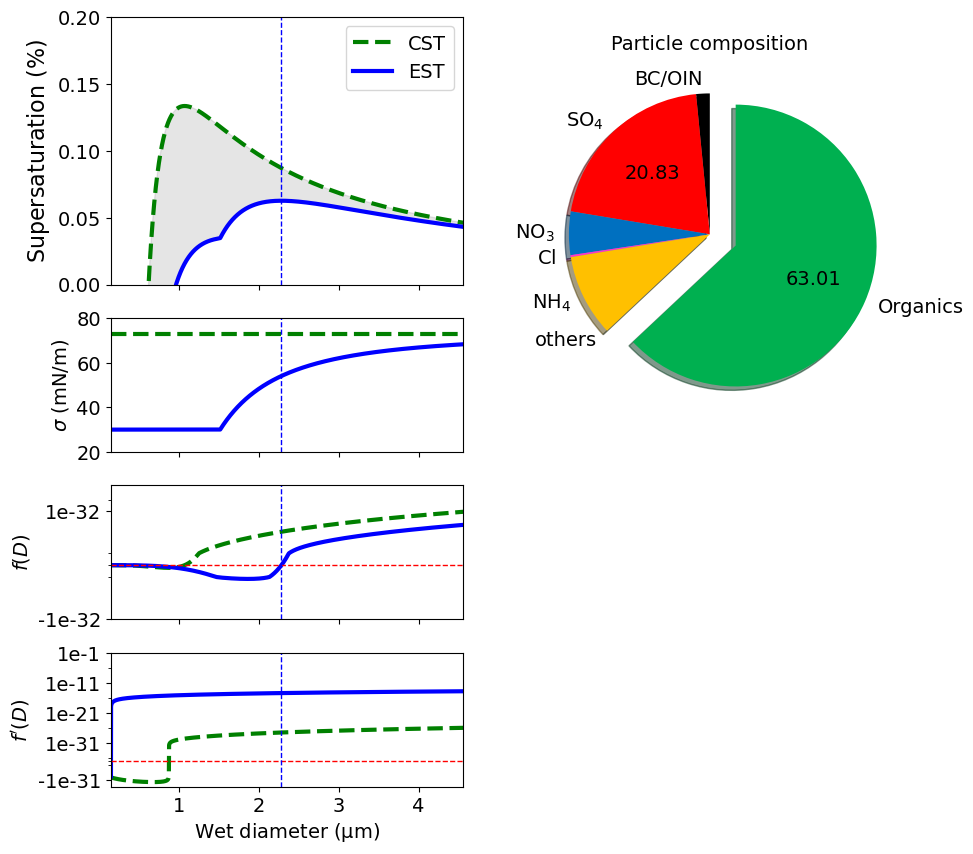

In [10]:
i=8254

d0, kappa, T, v_beta = file['dry_diam'][i], file['kappa'][i], file['T'][i], file['v_beta'][i]
volume = file['SO4'][i] + file['NO3'][i]+ file['Cl'][i]+ file['NH4'][i]+ file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]+ file['BC'][i] + file['OIN'][i]+ v_beta

old_ss, f_old, d_f_old = old_SS(d0, kappa, T)
Dw, ss_test, sigma_test, f_test, d_f_test, crit_diam_test = test_SS(d0,kappa,T,v_beta)

gs = gridspec.GridSpec(4, 2, height_ratios=[2, 1, 1, 1])
fig = plt.figure(figsize=(10, 10))

ax00 = plt.subplot(gs[0, 0])
ax10 = plt.subplot(gs[1, 0])
ax20 = plt.subplot(gs[2, 0])
ax30 = plt.subplot(gs[3, 0])
ax01_11 = plt.subplot(gs[0:2, 1])  

ax00.plot(Dw*1e6, old_ss, c = 'g', linewidth=3, ls ='--', label = 'CST')
ax00.plot(Dw*1e6, ss_test, c = 'b', linewidth=3, label = 'EST')
ax00.set_xlim(d0*1e6, 30*d0*1e6)
ax00.set_ylim(bottom = 0)
ax00.set_ylim(top = 1.5*(max(old_ss)))
ax00.set_ylabel("Supersaturation ($\mathrm{\%}$)", fontsize=16)
ax00.legend(fontsize=14)
ax00.tick_params(axis='x', labelsize=14)
ax00.tick_params(axis='y', labelsize=14)
ax00.fill_between(x=Dw*1e6, y1=old_ss, y2=new_ss, color='gray', alpha=0.2)
ax00.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax00.set_xticklabels('')

def my_autopct(pct):
	return ('%.2f' % pct) if pct > 15 else ''
# def my_labels(labels):
# 	return ('%.2f' % pct) if pct > 20 else ''
others = file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]
solid = file['BC'][i] + file['OIN'][i]

x = [solid, file['SO4'][i], file['NO3'][i], file['Cl'][i], file['NH4'][i], others,  v_beta]/volume*100
labels = [ 'BC/OIN','$\mathrm{SO_4}$', '$\mathrm{NO_3}$', '$\mathrm{Cl}$', '$\mathrm{NH_4}$', 'others', 'Organics']
colors = ['black', '#FF0000', '#0070C0', '#FF33CC','#FFC000', '#A5E8F1', '#00B050']

explode = [0, 0, 0, 0, 0, 0, 0.2]
ax01_11.pie(x, explode=explode, labels=labels, colors=colors, autopct=my_autopct, shadow=True, startangle=90, textprops={'size':14})
ax01_11.set_title('Particle composition', fontsize=14)
# ax01_11.legend(loc=1, bbox_to_anchor=(1, 1), fontsize=14)

ax10.plot(Dw*1e6, sigma_test*1e3, c = 'b', linewidth=3)
ax10.set_xlim(d0*1e6, 30*d0*1e6)
ax10.set_ylim(20, 80)
ax10.axhline(y=73, c = 'g',ls = '--', linewidth=3)
ax10.set_ylabel(r"$\sigma$ $\rm ( mN/\rm m)$", fontsize=14)
ax10.tick_params(axis='x', labelsize=14)
ax10.tick_params(axis='y', labelsize=14)
ax10.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax10.set_xticklabels('')

ax20.plot(Dw*1e6,f_old, c = 'g', ls ='--', linewidth=3)
ax20.plot(Dw*1e6,f_test, c = 'b', linewidth=3)
ax20.set_yscale('symlog', linthresh=1e-36)
ax20.axhline(0,c='r',ls='--',linewidth=1)
ax20.set_xlim(d0*1e6, 30*d0*1e6)
ax20.set_ylabel(r"$f(D)$", fontsize=14)
ax20.set_xticklabels('')
ax20.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax20.set_yticks([-1e-32, 1e-32]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax20.set_yticklabels(['-1e-32', '1e-32'], fontsize=14)

ax30.plot(Dw*1e6, d_f_old, c = 'g', ls ='--', linewidth=3)
ax30.plot(Dw*1e6, d_f_test, c = 'b', linewidth=3)
ax30.set_yscale('symlog', linthresh=1e-36)
ax30.axhline(0,c='r',ls='--',linewidth=1)
ax30.set_xlim(d0*1e6, 30*d0*1e6)
ax30.set_ylabel(r"$f'(D)$", fontsize=14)
ax30.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax30.set_yticks([-1e-31, 1e-31, 1e-21, 1e-11, 1e-1]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax30.set_yticklabels(['-1e-31', '1e-31', '1e-21', '1e-11', '1e-1'], fontsize=14)

ax30.set_xlabel('Wet diameter ($\mathrm{\mu m}$)', fontsize=14)
ax30.set_xticks([1, 2, 3, 4]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax30.set_xticklabels(['1', '2', '3', '4'], fontsize=14)

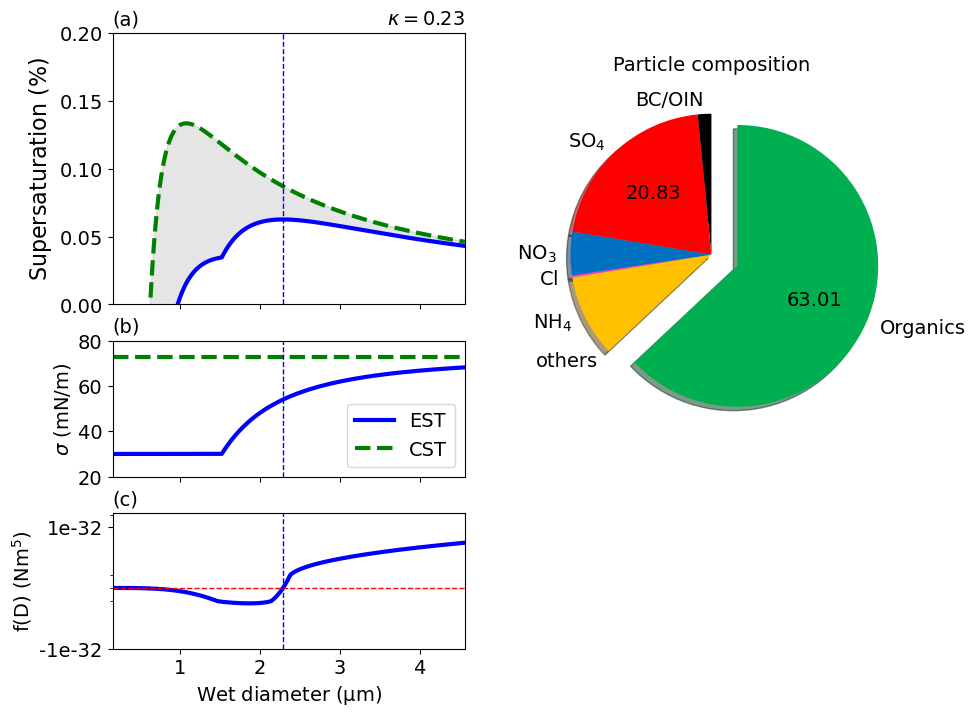

In [11]:
i=8254

d0, kappa, T, v_beta = file['dry_diam'][i], file['kappa'][i], file['T'][i], file['v_beta'][i]
volume = file['SO4'][i] + file['NO3'][i]+ file['Cl'][i]+ file['NH4'][i]+ file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]+ file['BC'][i] + file['OIN'][i]+ v_beta

old_ss, f_old, d_f_old = old_SS(d0, kappa, T)
Dw, new_ss, sigma, R_d, f_new, d_f_new, crit_diam, c_beta = new_SS(d0,kappa,T,v_beta)

gs = gridspec.GridSpec(3, 2, height_ratios=[2, 1, 1])
fig = plt.figure(figsize=(10, 8))

ax00 = plt.subplot(gs[0, 0])
ax10 = plt.subplot(gs[1, 0])
ax20 = plt.subplot(gs[2, 0])
ax01_11 = plt.subplot(gs[0:2, 1])  

ax00.plot(Dw*1e6, old_ss, c = 'g', linewidth=3, ls ='--', label = 'CST')
ax00.plot(Dw*1e6, new_ss, c = 'b', linewidth=3, label = 'EST')
ax00.set_xlim(d0*1e6, 30*d0*1e6)
ax00.set_ylim(bottom = 0)
ax00.set_ylim(top = 1.5*(max(old_ss)))
ax00.set_ylabel("Supersaturation ($\mathrm{\%}$)", fontsize=16)
# ax00.legend(fontsize=14)
ax00.tick_params(axis='x', labelsize=14)
ax00.tick_params(axis='y', labelsize=14)
ax00.fill_between(x=Dw*1e6, y1=old_ss, y2=new_ss, color='gray', alpha=0.2)
ax00.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax00.set_xticklabels('')
ax00.set_title('(a)', loc='left', fontsize=14)
ax00.set_title(f'$\kappa = {kappa:.2f}$', fontsize=14,loc='right')

def my_autopct(pct):
	return ('%.2f' % pct) if pct > 15 else ''
# def my_labels(labels):
# 	return ('%.2f' % pct) if pct > 20 else ''
others = file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]
solid = file['BC'][i] + file['OIN'][i]

x = [solid, file['SO4'][i], file['NO3'][i], file['Cl'][i], file['NH4'][i], others,  v_beta]/volume*100
labels = [ 'BC/OIN','$\mathrm{SO_4}$', '$\mathrm{NO_3}$', '$\mathrm{Cl}$', '$\mathrm{NH_4}$', 'others', 'Organics']
colors = ['black', '#FF0000', '#0070C0', '#FF33CC','#FFC000', '#A5E8F1', '#00B050']

explode = [0, 0, 0, 0, 0, 0, 0.2]
ax01_11.pie(x, explode=explode, labels=labels, colors=colors, autopct=my_autopct, shadow=True, startangle=90, textprops={'size':14})
ax01_11.set_title('Particle composition', fontsize=14)
# ax01_11.legend(loc=1, bbox_to_anchor=(1, 1), fontsize=14)

ax10.plot(Dw*1e6, sigma*1e3, c = 'b', linewidth=3, label = 'EST')
ax10.set_xlim(d0*1e6, 30*d0*1e6)
ax10.set_ylim(20, 80)
ax10.axhline(y=73, c = 'g',ls = '--', linewidth=3,label = 'CST')
ax10.set_ylabel(r"$\sigma$ $\rm ( mN/\rm m)$", fontsize=14)
ax10.tick_params(axis='x', labelsize=14)
ax10.tick_params(axis='y', labelsize=14)
ax10.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax10.set_xticklabels('')
ax10.legend(fontsize=14)
ax10.set_title('(b)', loc='left', fontsize=14)

# ax20.plot(Dw*1e6,f_old, c = 'g', ls ='--', linewidth=3)
ax20.plot(Dw*1e6,f_test, c = 'b', linewidth=3)
ax20.set_yscale('symlog', linthresh=1e-36)
ax20.axhline(0,c='r',ls='--',linewidth=1)
ax20.set_xlim(d0*1e6, 30*d0*1e6)
ax20.set_ylabel(r"$\rm f(D)\ (Nm^5)$", fontsize=14)
ax20.set_xticklabels('')
ax20.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax20.set_yticks([-1e-32, 1e-32]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax20.set_yticklabels(['-1e-32', '1e-32'], fontsize=14)
ax20.set_title('(c)', loc='left', fontsize=14)

ax20.set_xlabel('Wet diameter ($\mathrm{\mu m}$)', fontsize=14)
ax20.set_xticks([1, 2, 3, 4]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax20.set_xticklabels(['1', '2', '3', '4'], fontsize=14)

# plt.savefig('single_particle_example.pdf', bbox_inches='tight')

[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')]

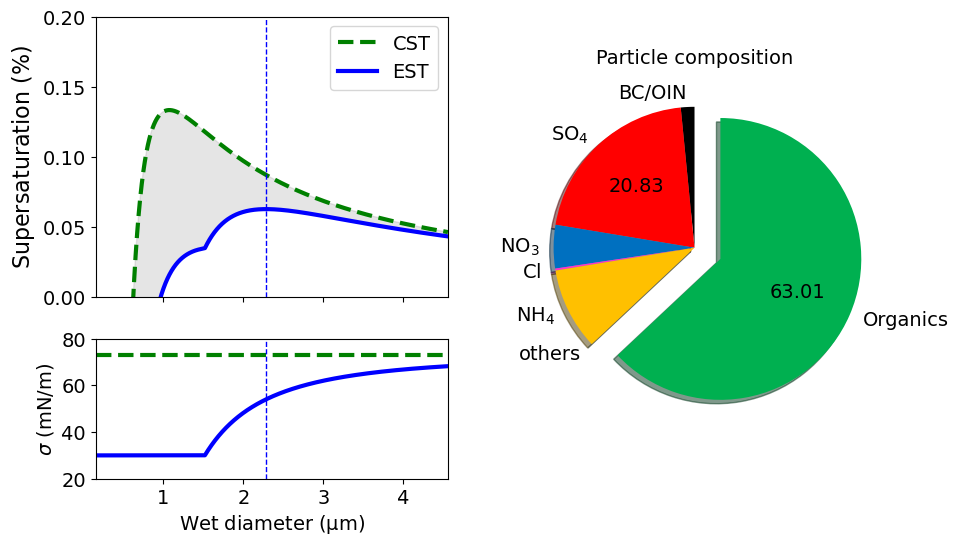

In [13]:
i=8254

d0, kappa, T, v_beta = file['dry_diam'][i], file['kappa'][i], file['T'][i], file['v_beta'][i]
volume = file['SO4'][i] + file['NO3'][i]+ file['Cl'][i]+ file['NH4'][i]+ file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]+ file['BC'][i] + file['OIN'][i]+ v_beta

old_ss, f_old, d_f_old = old_SS(d0, kappa, T)
Dw, new_ss, sigma, R_d, f_new, d_f_new, crit_diam = new_SS(d0,kappa,T,v_beta)

gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])
fig = plt.figure(figsize=(10, 6))

ax00 = plt.subplot(gs[0, 0])
ax10 = plt.subplot(gs[1, 0])
ax01_11 = plt.subplot(gs[0:2, 1])  

ax00.plot(Dw*1e6, old_ss, c = 'g', linewidth=3, ls ='--', label = 'CST')
ax00.plot(Dw*1e6, new_ss, c = 'b', linewidth=3, label = 'EST')
ax00.set_xlim(d0*1e6, 30*d0*1e6)
ax00.set_ylim(bottom = 0)
ax00.set_ylim(top = 1.5*(max(old_ss)))
ax00.set_ylabel("Supersaturation ($\mathrm{\%}$)", fontsize=16)
ax00.legend(fontsize=14)
ax00.tick_params(axis='x', labelsize=14)
ax00.tick_params(axis='y', labelsize=14)
ax00.fill_between(x=Dw*1e6, y1=old_ss, y2=new_ss, color='gray', alpha=0.2)
ax00.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax00.set_xticklabels('')

def my_autopct(pct):
	return ('%.2f' % pct) if pct > 15 else ''
# def my_labels(labels):
# 	return ('%.2f' % pct) if pct > 20 else ''
others = file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]
solid = file['BC'][i] + file['OIN'][i]

x = [solid, file['SO4'][i], file['NO3'][i], file['Cl'][i], file['NH4'][i], others,  v_beta]/volume*100
labels = [ 'BC/OIN','$\mathrm{SO_4}$', '$\mathrm{NO_3}$', '$\mathrm{Cl}$', '$\mathrm{NH_4}$', 'others', 'Organics']
colors = ['black', '#FF0000', '#0070C0', '#FF33CC','#FFC000', '#A5E8F1', '#00B050']

explode = [0, 0, 0, 0, 0, 0, 0.2]
ax01_11.pie(x, explode=explode, labels=labels, colors=colors, autopct=my_autopct, shadow=True, startangle=90, textprops={'size':14})
ax01_11.set_title('Particle composition', fontsize=14)
# ax01_11.legend(loc=1, bbox_to_anchor=(1, 1), fontsize=14)

ax10.plot(Dw*1e6, sigma*1e3, c = 'b', linewidth=3)
ax10.set_xlim(d0*1e6, 30*d0*1e6)
ax10.set_ylim(20, 80)
ax10.axhline(y=73, c = 'g',ls = '--', linewidth=3)
ax10.set_ylabel(r"$\sigma$ $\rm ( mN/\rm m)$", fontsize=14)
ax10.tick_params(axis='x', labelsize=14)
ax10.tick_params(axis='y', labelsize=14)
ax10.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax10.set_xticklabels('')

ax10.set_xlabel('Wet diameter ($\mathrm{\mu m}$)', fontsize=14)
ax10.set_xticks([1, 2, 3, 4]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax10.set_xticklabels(['1', '2', '3', '4'], fontsize=14)

/tmp/ipykernel_11428/2434107029.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


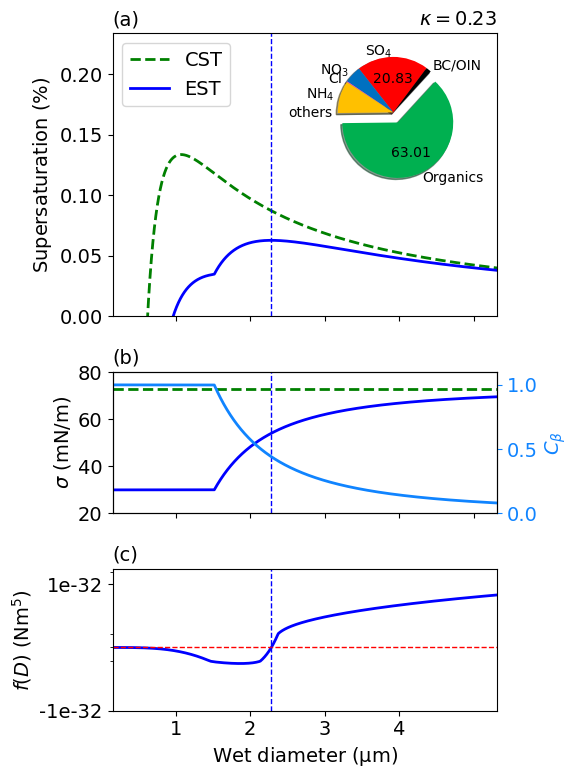

In [13]:
i=8254

d0, kappa, T, v_beta = file['dry_diam'][i], file['kappa'][i], file['T'][i], file['v_beta'][i]
volume = file['SO4'][i] + file['NO3'][i]+ file['Cl'][i]+ file['NH4'][i]+ file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]+ file['BC'][i] + file['OIN'][i]+ v_beta

old_ss, f_old, d_f_old = old_SS(d0, kappa, T)
Dw, ss_test, sigma_test, f_test, d_f_test, crit_diam_test = test_SS(d0,kappa,T,v_beta)
Dw, new_ss, sigma, R_d, f_new, d_f_new, crit_diam, coverage = new_SS(d0,kappa,T,v_beta)

# 调整 GridSpec 设置为只有一列
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
fig = plt.figure(figsize=(6, 8))  # 调整大小以适应单列布局

# 创建子图
ax00 = plt.subplot(gs[0])
ax10 = plt.subplot(gs[1])
ax20 = plt.subplot(gs[2])

# 第一个子图的绘图代码
ax00.plot(Dw*1e6, old_ss, c = 'g', linewidth=2, ls ='--', label = 'CST')
ax00.plot(Dw*1e6, new_ss, c = 'b', linewidth=2, label = 'EST')
ax00.set_xlim(d0*1e6, 35*d0*1e6)
ax00.set_ylim(bottom = 0)
ax00.set_ylim(top = 1.75*(max(old_ss)))
ax00.set_ylabel("Supersaturation ($\mathrm{\%}$)")
ax00.tick_params(axis='x')
ax00.tick_params(axis='y')
# ax00.fill_between(x=Dw*1e6, y1=old_ss, y2=new_ss, color='gray', alpha=0.2)
ax00.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax00.set_xticklabels('')
ax00.legend(loc='upper left')
ax00.set_title('(a)', loc='left', fontsize=14)
ax00.set_title(f'$\kappa = {kappa:.2f}$', fontsize=14,loc='right')

def my_autopct(pct):
	return ('%.2f' % pct) if pct > 15 else ''
# def my_labels(labels):
# 	return ('%.2f' % pct) if pct > 20 else ''
others = file['CO3'][i]+ file['Na'][i]+ file['Ca'][i]
solid = file['BC'][i] + file['OIN'][i]

x = [solid, file['SO4'][i], file['NO3'][i], file['Cl'][i], file['NH4'][i], others,  v_beta]/volume*100
labels = [ 'BC/OIN','$\mathrm{SO_4}$', '$\mathrm{NO_3}$', '$\mathrm{Cl}$', '$\mathrm{NH_4}$', 'others', 'Organics']
colors = ['black', '#FF0000', '#0070C0', '#FF33CC','#FFC000', '#A5E8F1', '#00B050']

explode = [0, 0, 0, 0, 0, 0, 0.2]

# 在第一个子图内创建饼图的 inset
ax_inset = inset_axes(ax00, width="49%", height="49%", loc="upper right")
x = [solid, file['SO4'][i], file['NO3'][i], file['Cl'][i], file['NH4'][i], others, v_beta] / volume * 100
ax_inset.pie(x, explode=explode, labels=labels, colors=colors, autopct=my_autopct, shadow=True, startangle=47.5, textprops={'size': 10})
# ax_inset.set_title('Particle composition', fontsize=10)

# 第二个子图的绘图代码
ax10.plot(Dw*1e6, sigma*1e3, c = 'b', linewidth=2, label = 'CST')
ax10.set_xlim(d0*1e6, 35*d0*1e6)
ax10.set_ylim(20, 80)
ax10.axhline(y=73, c = 'g',ls = '--', linewidth=2, label = 'EST')
ax10.set_ylabel(r"$\sigma$ $\rm ( mN/\rm m)$")
ax10.tick_params(axis='x')
ax10.tick_params(axis='y')
ax10.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax10.set_xticklabels('')
ax10.set_title('(b)', loc='left', fontsize=14)

ax10_r = ax10.twinx()
ax10_r.plot(Dw*1e6, coverage, c = '#1084FF', linewidth=2)
ax10_r.set_ylim(0, 1.1)
ax10_r.set_ylabel(r'$C_\beta$',color='#1084FF')
ax10_r.tick_params(axis='y', colors='#1084FF')

# 第三个子图的绘图代码
# ax20.plot(Dw*1e6,f_old, c = 'g', ls ='--', linewidth=2)
ax20.plot(Dw*1e6,f_test, c = 'b', linewidth=2)  # test_ss is previous f(D) with R(D)
ax20.set_yscale('symlog', linthresh=1e-36)
ax20.axhline(0,c='r',ls='--',linewidth=1)
ax20.set_xlim(d0*1e6, 35*d0*1e6)
ax20.set_ylabel(r"$f(D)\rm\ (Nm^5)$")
ax20.set_xticklabels('')
ax20.axvline(x=crit_diam*1e6, c='b', ls='--',linewidth=1)
ax20.set_yticks([-1e-32, 1e-32]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax20.set_yticklabels(['-1e-32', '1e-32'])

ax20.set_xlabel('Wet diameter ($\mathrm{\mu m}$)')
ax20.set_xticks([1, 2, 3, 4]) # Assuming your x-axis is in terms of µm multiplied by 1e6
ax20.set_xticklabels(['1', '2', '3', '4'])
ax20.set_title('(c)', loc='left', fontsize=14)

plt.tight_layout()
plt.savefig('single_particle_example.pdf', bbox_inches='tight', dpi=300)